importing Libraries

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importing & Inspecting Data 

In [39]:
startups = pd.read_excel('startup-expansion.xlsx')
startups

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue
0,1,Peoria,Arizona,Region 2,Old,2601,48610
1,2,Midland,Texas,Region 2,Old,2727,45689
2,3,Spokane,Washington,Region 2,Old,2768,49554
3,4,Denton,Texas,Region 2,Old,2759,38284
4,5,Overland Park,Kansas,Region 2,Old,2869,59887
...,...,...,...,...,...,...,...
145,146,Paterson,New Jersey,Region 1,New,2251,34603
146,147,Brownsville,Texas,Region 2,New,3675,63148
147,148,Rockford,Illinois,Region 1,New,2648,43377
148,149,College Station,Texas,Region 2,New,2994,22457


In [40]:
startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Store ID         150 non-null    int64 
 1   City             150 non-null    object
 2   State            150 non-null    object
 3   Sales Region     150 non-null    object
 4   New Expansion    150 non-null    object
 5   Marketing Spend  150 non-null    int64 
 6   Revenue          150 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 8.3+ KB


In [41]:
startups.duplicated().sum()

np.int64(0)

In [42]:
startups[['Marketing Spend', 'Revenue']].describe().round(2)

,Marketing Spend,Revenue
count,150.00,150.00
mean,2893.15,39301.43
std,367.86,15465.75
min,1811.00,15562.00
25%,2662.25,21113.50
50%,2898.00,42993.00
75%,3111.50,51145.50
max,3984.00,68828.00


Preprocessing Data

In [43]:
startups['City'].value_counts()

City
Rochester          2
Midland            1
Spokane            1
Denton             1
Peoria             1
                  ..
Paterson           1
Brownsville        1
Rockford           1
College Station    1
Thousand Oaks      1
Name: count, Length: 149, dtype: int64

In [44]:
startups['State'].unique()

array(['Arizona', 'Texas', 'Washington', 'Kansas', 'New York', 'Alabama',
       'California', 'Massachusetts', 'New Mexico', 'Mississippi',
       'Oregon', 'Florida', 'Oklahoma', 'New Jersey', 'Utah', 'Colorado',
       'Michigan', 'South Carolina', 'Virginia', 'Ohio', 'New Hampshire',
       'Connecticut', 'Iowa', 'Arkansas', 'Tennessee', 'North Carolina',
       'Georgia', 'Illinois', 'Montana', 'Indiana', 'South Dakota',
       'Louisiana', 'Minnesota', 'Wisconsin', 'Rhode Island'],
      dtype=object)

In [45]:
startups['State'].value_counts()

State
California        40
Texas             17
Florida           12
Washington         7
Colorado           5
Illinois           5
New Jersey         4
Connecticut        4
Georgia            4
Alabama            4
Arizona            3
South Carolina     3
Michigan           3
Utah               3
Iowa               3
Tennessee          3
Massachusetts      3
New York           3
Kansas             3
Oregon             2
North Carolina     2
Louisiana          2
Virginia           2
Ohio               2
Oklahoma           1
New Mexico         1
Mississippi        1
Arkansas           1
New Hampshire      1
Indiana            1
Montana            1
South Dakota       1
Minnesota          1
Wisconsin          1
Rhode Island       1
Name: count, dtype: int64

In [46]:
startups['New Expansion'].unique()

array(['Old', 'New'], dtype=object)

In [47]:
startups['Sales Region'].unique()

array(['Region 2', 'Region 1'], dtype=object)

In [48]:
startups['Sales Region'].value_counts()

Sales Region
Region 2    86
Region 1    64
Name: count, dtype: int64

In [49]:
startups['New Expansion'].value_counts()

New Expansion
Old    140
New     10
Name: count, dtype: int64

Exploring & Analysing Data

In [50]:
startups.sample(10)

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue
115,116,Woodbridge,New Jersey,Region 1,Old,3319,19811
130,131,Savannah,Georgia,Region 1,Old,2028,36029
144,145,Glendale,California,Region 2,New,2363,49376
118,119,Huntington Beach,California,Region 2,Old,2527,54145
60,61,Columbia,South Carolina,Region 1,Old,2874,42803
16,17,Tallahassee,Florida,Region 1,Old,2737,47729
55,56,Thornton,Colorado,Region 2,Old,2642,46490
95,96,Dayton,Ohio,Region 1,Old,2805,42026
124,125,Rochester,Minnesota,Region 1,Old,2854,18099
13,14,Jackson,Mississippi,Region 1,Old,3466,54701


<Axes: xlabel='Sales Region'>

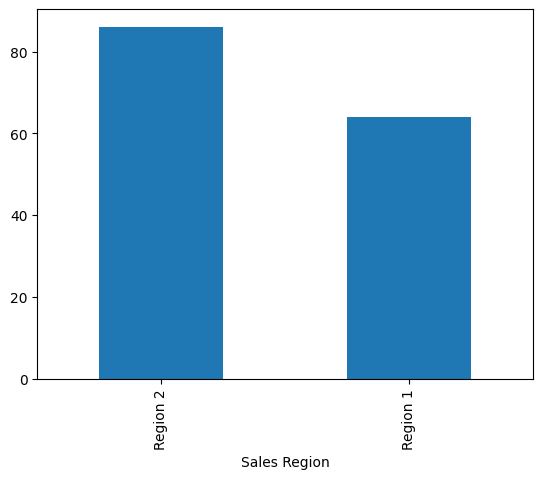

In [51]:
startups['Sales Region'].value_counts().plot.bar()

In [52]:
startups.groupby('New Expansion').groups

{'New': [140, 141, 142, 143, 144, 145, 146, 147, 148, 149], 'Old': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]}

In [53]:
startups[startups['New Expansion'] == 'Old'].groupby('City').max()['Revenue'].nlargest(10)

City
Little Rock       68828
Grand Rapids      65475
Rochester         64906
Oxnard            64302
Fontana           63027
Providence        62337
Birmingham        60338
Overland Park     59887
San Bernardino    59870
Worcester         59840
Name: Revenue, dtype: int64

In [54]:
startups[startups['New Expansion'] == 'New'].groupby('City').max()['Revenue'].nlargest(10)

City
Brownsville         63148
Chattanooga         55357
Rancho Cucamonga    52366
Glendale            49376
Tempe               48954
Joliet              48315
Rockford            43377
Thousand Oaks       40141
Paterson            34603
College Station     22457
Name: Revenue, dtype: int64

In [55]:
startups['profit'] = startups['Revenue'] - startups['Marketing Spend']
startups

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue,profit
0,1,Peoria,Arizona,Region 2,Old,2601,48610,46009
1,2,Midland,Texas,Region 2,Old,2727,45689,42962
2,3,Spokane,Washington,Region 2,Old,2768,49554,46786
3,4,Denton,Texas,Region 2,Old,2759,38284,35525
4,5,Overland Park,Kansas,Region 2,Old,2869,59887,57018
...,...,...,...,...,...,...,...,...
145,146,Paterson,New Jersey,Region 1,New,2251,34603,32352
146,147,Brownsville,Texas,Region 2,New,3675,63148,59473
147,148,Rockford,Illinois,Region 1,New,2648,43377,40729
148,149,College Station,Texas,Region 2,New,2994,22457,19463


In [56]:
startups['profit'].sum()

np.int64(5461243)

In [ ]:
startups['ROI'] = round((startups['profit'] / startups['Marketing Spend']) * 100, 2)


In [65]:
startups['ROI%'] = startups['ROI'] / 100

In [66]:
startups.head()

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue,profit,ROI,ROI%
0,1,Peoria,Arizona,Region 2,Old,2601,48610,46009,1768.90,17.6890
1,2,Midland,Texas,Region 2,Old,2727,45689,42962,1575.43,15.7543
2,3,Spokane,Washington,Region 2,Old,2768,49554,46786,1690.25,16.9025
3,4,Denton,Texas,Region 2,Old,2759,38284,35525,1287.60,12.8760
4,5,Overland Park,Kansas,Region 2,Old,2869,59887,57018,1987.38,19.8738


In [67]:
startups.to_csv('startup-expansion-modified.csv')